# HW-6 Information Retrieval - Vector Space Model

In [14]:
image_save_path = "/mnt/d/NTHU/課程Course/文件探勘/hw6/image"

In [ ]:
query="animated cat bus umbrella forest towards girl"

## Without feature selection

### Read file and preprocessing

In [101]:
import glob,nltk,string,re
from nltk.corpus import stopwords
punctuation = string.punctuation # '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
re_punctuation = "[{}]".format(punctuation) # for regex
stopword_set = set(stopwords.words('english'))

doc_all = {}
filepath=glob.glob('./movies_synopsis/*.txt')
path_pre_len = len("./movies_synopsis/") 
path_post_len = len(".txt")

for file in filepath:
    #open file
    print(file[path_pre_len:-path_post_len])
    with open(file, "r") as f:    
        #read text
        text = f.read()
        #remove symbols
        text_removed_punctuation = re.sub(re_punctuation,"",text)
        #normalize
        text_normalized = text_removed_punctuation.lower()
        #tokenize
        token = nltk.word_tokenize(text_normalized)
        
        
        # 以list格式存在list內
        doc_all[file[path_pre_len:-path_post_len]]=token

12 Angry Men (1957)
12 Years a Slave (2013)
1917 (2019)
2001_ A Space Odyssey (1968)
3 Idiots (2009)
A Beautiful Mind (2001)
A Clockwork Orange (1971)
A Separation (2011)
Ace in the Hole (1951)
Akira (1988)
Aladdin (1992)
Alien (1979)
Aliens (1986)
All About Eve (1950)
Amadeus (1984)
American Beauty (1999)
American History X (1998)
Amores Perros (2000)
Amélie (2001)
Andhadhun (2018)
Andrei Rublev (1966)
Apocalypse Now (1979)
Avengers_ Endgame (2019)
Avengers_ Infinity War (2018)
Babam ve Oglum (2005)
Back to the Future (1985)
Barry Lyndon (1975)
Batman Begins (2005)
Before Sunrise (1995)
Before Sunset (2004)
Ben-Hur (1959)
Bicycle Thieves (1948)
Blade Runner (1982)
Braveheart (1995)
Butch Cassidy and the Sundance Kid (1969)
Capharnaüm (2018)
Casablanca (1942)
Casino (1995)
Catch Me If You Can (2002)
Children of Heaven (1997)
Chinatown (1974)
Cinema Paradiso (1988)
Citizen Kane (1941)
City Lights (1931)
City of God (2002)
Coco (I) (2017)
Come and See (1985)
Cool Hand Luke (1967)
Dangal 

### convert all document to vector, use tfidf weighting

In [102]:
# Declare all function 
# create tf function
def tf(term, token_doc):
    tf = token_doc.count(term)/len(token_doc)
    return tf

# create function to calculate how many doc contain the term 
def numDocsContaining(word, token_doclist):
    doccount = 0
    for doc_token in token_doclist:
        if doc_token.count(word) > 0:
            doccount +=1
    return doccount
  
import math
# create function to calculate  Inverse Document Frequency in doclist - this list of all documents
def idf(word, token_doclist):
    n = len(token_doclist)
    df = numDocsContaining(word, token_doclist)
    return math.log10(n/df)

#define a function to do cosine normalization a data dictionary
def cos_norm(dic): # dic is distionary data structure
    import numpy as np
    dic_norm={}
    factor=1.0/np.sqrt(sum([np.square(i) for i in dic.values()]))
    for k in dic:
        dic_norm[k] = dic[k]*factor
    return dic_norm

#create function to calculate normalize tfidf 
def compute_tfidf(token_doc,bag_words_idf):
    tfidf_doc={}
    for word in set(token_doc):
        tfidf_doc[word]= tf(word,token_doc) * bag_words_idf[word]   
    tfidf_norm = cos_norm(tfidf_doc)
    return tfidf_norm

# create normalize term frequency
def tf_norm(token_doc):
    tf_norm={}
    for term in token_doc:
        tf = token_doc.count(term)/len(token_doc)
        tf_norm[term]=tf
    tf_max = max(tf_norm.values())
    for term, value in tf_norm.items():
        tf_norm[term]= 0.5 + 0.5*value/tf_max
    return tf_norm

def compute_tfidf_query(query_token,bag_words_idf):
    tfidf_query={}
    tf_norm_query = tf_norm(query_token)
    for term, value in tf_norm_query.items():
        tfidf_query[term]=value*bag_words_idf[term]   
    return tfidf_query

### Processing

In [103]:
import os
from datetime import datetime
from pytz import timezone
now = datetime.now(timezone('Asia/Taipei'))
current_time = now.strftime("%H:%M:%S")
print("Start tfidf processing at", current_time)

#create bag words
bag_words =[] # declare bag_words is a list
for doc in doc_all.keys():
    bag_words += doc_all[doc]
bag_words=set(bag_words)

#calculate idf for every word in bag_words
bag_words_idf={} # declare "bag_words_idf" data structure is dictionary 
bag_words_len = len(bag_words)
bag_word_10 = round(bag_words_len/10,0)
print("the number of term in bag_word", bag_words_len)
print("Start idf processing")
i=0
for word in bag_words:
    i+=1
    if (i%bag_word_10==0):print("finish %s idf processing" %(str(round(i*10/bag_word_10))+"%"))
    bag_words_idf[word]= idf(word,doc_all.values())

print("finish idf processing")
##calculate tfidf with cosine normalization
tfidf={} # declare tfidf dictionary to store tfidf value
for doc in doc_all.keys():
    tfidf[doc]= compute_tfidf(doc_all[doc],bag_words_idf)
# print("finish tfidf processing")
finish_now = datetime.now(timezone('Asia/Taipei'))
current_time = finish_now.strftime("%H:%M:%S")
print("Finish tfidf processing at", current_time)

cost_time = finish_now-now
print("It cost %d seconds" % (cost_time.seconds))

Start tfidf processing at 19:54:59
the number of term in bag_word 27004
Start idf processing
finish 10% idf processing
finish 20% idf processing
finish 30% idf processing
finish 40% idf processing
finish 50% idf processing
finish 60% idf processing
finish 70% idf processing
finish 80% idf processing
finish 90% idf processing
finish 100% idf processing
finish idf processing
Finish tfidf processing at 19:58:35
It cost 215 seconds


### Input query text, and take similarity, if you change the query text, just need to  run the code again from here

In [116]:
# query="an encouraging Indian comedy with music"
query_token_raw= nltk.word_tokenize(query)
query_token = [term for term in query_token_raw if term in bag_words]

tfidf_query =compute_tfidf_query(query_token,bag_words_idf) #calculate tfidf for query text
print(tfidf_query)

{'animated': 1.9225524667613758, 'cat': 1.2235824624253568, 'bus': 0.9847003735102201, 'umbrella': 2.098643725817057, 'forest': 1.0379458854634454, 'towards': 0.6362457279181009, 'girl': 0.5075791187905577}


In [117]:
# add tfidf of query text to tfidf of all doc and convert to dataframe
tfidf["query"]=tfidf_query

import pandas as pd
tfidf_df = pd.DataFrame(tfidf).transpose()
tfidf_df= tfidf_df.fillna(0) # replace all NaN by zero

from scipy.spatial.distance import cosine
cosine_sim ={}
for row in tfidf_df.index:
    if row != "query":
        cosine_sim[row]= 1-cosine(tfidf_df.loc[row],tfidf_df.loc["query"])

# the top 10 relevant document
cosine_sim_top10 = dict(sorted(cosine_sim.items(), key=lambda item: item[1],reverse=True)[:10])
print(cosine_sim_top10)

{'My Neighbor Totoro (1988)': 0.09782844256038614, 'Princess Mononoke (1997)': 0.05410232099229417, 'Forrest Gump (1994)': 0.030619106094797788, 'Throne of Blood (1957)': 0.02546299696544263, 'Monty Python and the Holy Grail (1975)': 0.02378472539427523, 'Incendies (2010)': 0.02313042765036899, 'It Happened One Night (1934)': 0.02284759637166922, 'Alien (1979)': 0.019012196175280938, 'The Shining (1980)': 0.018873687825606056, 'The Lord of the Rings_ The Two Towers (2002)': 0.01673325547996507}


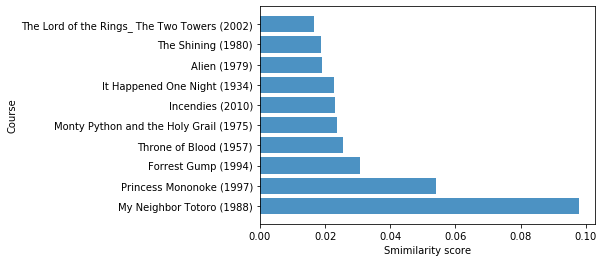

In [118]:
#plot barchart
import matplotlib.pyplot as plt
data = cosine_sim_top10
plt.barh(range(len(data)), list(data.values()), align='center', alpha=0.8)
plt.yticks(range(len(data)), list(data.keys())) # label for y axis
plt.xlabel('Smimilarity score')
plt.ylabel('Course')

# save graph
plt.savefig(image_save_path+"barchart1.png", bbox_inches='tight', dpi=600)
plt.show()

## With feature selection

In [119]:
filter_tags = set(["NN","NNS","NNP","NNPS","PRP","PRP$"])

In [120]:
import glob,nltk,string,re
from nltk.corpus import stopwords
punctuation = string.punctuation # '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
re_punctuation = "[{}]".format(punctuation) # for regex
stopword_set = set(stopwords.words('english'))

doc_all_2 = {}
filepath=glob.glob('./movies_synopsis/*.txt')
path_pre_len = len("./movies_synopsis/") 
path_post_len = len(".txt")

for file in filepath:
    #open file
    print(file[path_pre_len:-path_post_len])
    with open(file, "r") as f:    
        #read text
        text = f.read()
        #remove symbols
        text_removed_punctuation = re.sub(re_punctuation,"",text)
        #normalize
        text_normalized = text_removed_punctuation.lower()
        #tokenize
        token = nltk.word_tokenize(text_normalized)
        #remove stop words
        filtered_tokens = [word for word in token if not word in stopword_set]
        
        # 以list格式存在dict內
        doc_all_2[file[path_pre_len:-path_post_len]]=filtered_tokens

12 Angry Men (1957)
12 Years a Slave (2013)
1917 (2019)
2001_ A Space Odyssey (1968)
3 Idiots (2009)
A Beautiful Mind (2001)
A Clockwork Orange (1971)
A Separation (2011)
Ace in the Hole (1951)
Akira (1988)
Aladdin (1992)
Alien (1979)
Aliens (1986)
All About Eve (1950)
Amadeus (1984)
American Beauty (1999)
American History X (1998)
Amores Perros (2000)
Amélie (2001)
Andhadhun (2018)
Andrei Rublev (1966)
Apocalypse Now (1979)
Avengers_ Endgame (2019)
Avengers_ Infinity War (2018)
Babam ve Oglum (2005)
Back to the Future (1985)
Barry Lyndon (1975)
Batman Begins (2005)
Before Sunrise (1995)
Before Sunset (2004)
Ben-Hur (1959)
Bicycle Thieves (1948)
Blade Runner (1982)
Braveheart (1995)
Butch Cassidy and the Sundance Kid (1969)
Capharnaüm (2018)
Casablanca (1942)
Casino (1995)
Catch Me If You Can (2002)
Children of Heaven (1997)
Chinatown (1974)
Cinema Paradiso (1988)
Citizen Kane (1941)
City Lights (1931)
City of God (2002)
Coco (I) (2017)
Come and See (1985)
Cool Hand Luke (1967)
Dangal 

In [121]:
POS_doc_all = {}
for key,value in doc_all_2.items():
    pos_tags =nltk.pos_tag(value)
    pos_tags_selected = list(filter(lambda x: x[1] in filter_tags,  pos_tags))
    doc_list = []
    for word in pos_tags_selected:
        doc_list.append(word[0])
    POS_doc_all[key] = doc_list
    print("%d -> %d" % (len(pos_tags),len(POS_doc_all[key])))

961 -> 405
1367 -> 644
328 -> 150
1063 -> 533
735 -> 375
608 -> 292
1522 -> 744
528 -> 261
219 -> 105
1478 -> 693
1021 -> 441
2475 -> 1071
2767 -> 1252
680 -> 299
454 -> 225
560 -> 258
1133 -> 492
1211 -> 523
585 -> 263
619 -> 276
474 -> 230
876 -> 420
931 -> 470
764 -> 395
18 -> 13
3879 -> 1854
1285 -> 604
3455 -> 1666
246 -> 117
375 -> 167
754 -> 340
305 -> 143
1780 -> 786
365 -> 174
522 -> 250
18 -> 13
543 -> 242
1512 -> 690
919 -> 412
140 -> 64
1167 -> 567
360 -> 157
842 -> 391
382 -> 176
492 -> 245
383 -> 184
18 -> 13
649 -> 271
729 -> 350
1304 -> 548
1457 -> 655
1016 -> 440
1013 -> 520
2168 -> 1026
334 -> 168
1370 -> 665
755 -> 385
398 -> 208
184 -> 92
3190 -> 1477
1261 -> 623
1853 -> 833
679 -> 328
565 -> 275
323 -> 143
1099 -> 538
60 -> 36
664 -> 357
2210 -> 986
2440 -> 1096
712 -> 304
959 -> 457
814 -> 405
408 -> 194
904 -> 405
104 -> 50
367 -> 168
637 -> 293
699 -> 362
2867 -> 1345
18 -> 13
199 -> 100
662 -> 320
3261 -> 1425
18 -> 13
99 -> 44
970 -> 468
399 -> 193
2821 -> 132

**Step2: convert all document to vector, use tfidf weighting**

In [122]:
import os
from datetime import datetime
from pytz import timezone
now = datetime.now(timezone('Asia/Taipei'))
current_time = now.strftime("%H:%M:%S")
print("Start tfidf processing at", current_time)

#create bag words
bag_words =[] # declare bag_words is a list
for doc in POS_doc_all.keys():
    bag_words += POS_doc_all[doc]
bag_words=set(bag_words)

#calculate idf for every word in bag_words
bag_words_idf={} # declare "bag_words_idf" data structure is dictionary 
bag_words_len = len(bag_words)
bag_word_10 = round(bag_words_len/10,0)
print("the number of term in bag_word", bag_words_len)
print("Start idf processing")
i=0
for word in bag_words:
    i+=1
    if (i%bag_word_10==0):print("finish %s idf processing" %(str(round(i*10/bag_word_10))+"%"))
    bag_words_idf[word]= idf(word,POS_doc_all.values())

print("finish idf processing")
##calculate tfidf with cosine normalization
tfidf={} # declare tfidf dictionary to store tfidf value
for doc in POS_doc_all.keys():
    tfidf[doc]= compute_tfidf(POS_doc_all[doc],bag_words_idf)
# print("finish tfidf processing")
finish_now = datetime.now(timezone('Asia/Taipei'))
current_time = finish_now.strftime("%H:%M:%S")
print("Finish tfidf processing at", current_time)

cost_time = finish_now-now
print("It cost %d seconds" % (cost_time.seconds))

Start tfidf processing at 20:10:21
the number of term in bag_word 16539
Start idf processing
finish 10% idf processing
finish 20% idf processing
finish 30% idf processing
finish 40% idf processing
finish 50% idf processing
finish 60% idf processing
finish 70% idf processing
finish 80% idf processing
finish 90% idf processing
finish idf processing
Finish tfidf processing at 20:11:51
It cost 90 seconds


**Step3: Input query text, and take similarity, if you change the query text, just need to  run the code again from here** 

In [123]:
# query="japanese animated cat bus umbrella"
query_token_raw= nltk.word_tokenize(query)
query_token = [term for term in query_token_raw if term in bag_words]

tfidf_query =compute_tfidf_query(query_token,bag_words_idf) #calculate tfidf for query text
print(tfidf_query)

{'cat': 1.2235824624253568, 'bus': 1.0774544267471189, 'umbrella': 2.399673721481038, 'forest': 1.7007037171450194, 'towards': 0.6672799616580696, 'girl': 0.5867603648381825}


In [124]:
# add tfidf of query text to tfidf of all doc and convert to dataframe
tfidf["query"]=tfidf_query

import pandas as pd
tfidf_df = pd.DataFrame(tfidf).transpose()
tfidf_df= tfidf_df.fillna(0) # replace all NaN by zero

from scipy.spatial.distance import cosine
cosine_sim ={}
for row in tfidf_df.index:
    if row != "query":
        cosine_sim[row]= 1-cosine(tfidf_df.loc[row],tfidf_df.loc["query"])

# the top 10 relevant document
cosine_sim_top10 = dict(sorted(cosine_sim.items(), key=lambda item: item[1],reverse=True)[:10])
print(cosine_sim_top10)

{'My Neighbor Totoro (1988)': 0.1430793741881018, 'It Happened One Night (1934)': 0.04222107840889333, 'Incendies (2010)': 0.03471076514036353, 'Harry Potter and the Deathly Hallows_ Part 2 (2011)': 0.030329240410653435, 'Forrest Gump (1994)': 0.029562311264581975, 'The Shining (1980)': 0.0236440611075045, 'Alien (1979)': 0.02248929676639011, 'City Lights (1931)': 0.021889264126957575, 'Mary and Max (2009)': 0.021466527178040873, 'The Third Man (1949)': 0.018079390947476126}


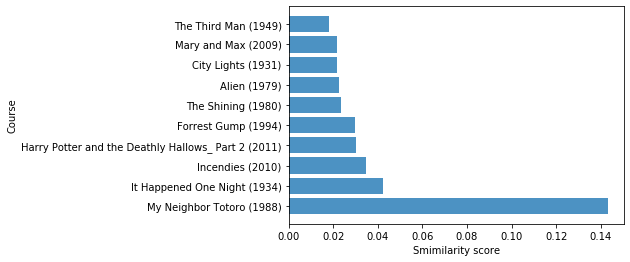

In [125]:
#plot barchart
import matplotlib.pyplot as plt
data = cosine_sim_top10
plt.barh(range(len(data)), list(data.values()), align='center', alpha=0.8)
plt.yticks(range(len(data)), list(data.keys())) # label for y axis
plt.xlabel('Smimilarity score')
plt.ylabel('Course')

# save graph
plt.savefig(image_save_path+"barchart2.png", bbox_inches='tight', dpi=600)
plt.show()

## Result

### Purpose

![](https://i.imgur.com/z56CNN1.png)
Our query is set for finding a movie that we remember some of its  contents while we forget its name. As we were not sure whether there is the Japanese animation in the folder of movie synopsis, and we are supposed to find the movie "Totoro".



### Query
`"animated cat bus umbrella forest girl"`

### Speed
+ Without feature selection: **229** s
+ With feature selection: **90** s
+ Reduce : **60.7**%

### Number of feature
+ Without feature selection: **27004** features
+ With feature selection: **16539** features
+ Reduce : **38.8**%

### Query Result
![](https://i.imgur.com/XkNeM3P.png)
![](https://i.imgur.com/4DZB4xs.png)


### Conclusion
The result is same as what we expect. In our outcome, we can find that "Totoro" get the highest score in the similarity score, which finally meet the goal we set. 
However, at the beginning the result of second and third place doesn't fit the features of Japanese animation very well, but after the feature selection, our similarity of "Totoro" is improved significantly. 
After the feature selection, our tfidf processing time reduces about 60% and the number of features both decrease. 
